In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating the data

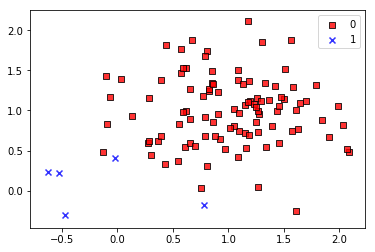

In [12]:
center=[[1,1],[-0.2,-0.2]]
data_size_0,data_size_1=100,5
data=[c+np.random.randn(data_size,2)*0.5 for data_size,c in zip([data_size_0,data_size_1],center) ]
data=np.concatenate(data)
label = np.array([0 if i<data_size_0 else 1 for i in range(data_size_0+data_size_1)])
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
for i in range(2):
    plt.scatter(data[:,0][label==i],data[:,1][label==i],alpha=0.8,label=i,edgecolor='black',c=colors[i],marker=markers[i])
plt.legend();

## Train

In [15]:
from sklearn.metrics import f1_score
import warnings
warnings.simplefilter('ignore')
class kNearestNeighbors:
    def __init__(self,k,a_th,data_size_0,data_size_1):
        self.k=k
        self.a_th=a_th
        self.data_size_0=data_size_0
        self.data_size_1=data_size_1
        self.pi0=data_size_0/(data_size_0+data_size_1)
        self.pi1=data_size_1/(data_size_0+data_size_1)
    def distance(self,x,y):
        return ((x-y)**2).sum()
    def calc_F(self,data,label):
        self.anomaly_score=np.zeros(len(data))
        for i in range(len(data)):
            dist=np.array([ self.distance(data[i],data[j]) for j in range(len(data))])
            dist_sorted_index=np.argsort(dist)[1:self.k+1]
            n1=(label[dist_sorted_index]==1).sum()  #number of 1
            n0=(label[dist_sorted_index]==0).sum()  #number of 0
            self.anomaly_score[i]=np.log((self.pi0*n1)/(self.pi1*n0))
        label_pred=self.anomaly_score>self.a_th
        self.label_pred=label_pred
        return f1_score(label,label_pred)

In [16]:
#Grid Search
k_list=list(range(1,11,1))
a_th_list=list(range(1,11,1))
def search_best_model(k_list,a_th_list):
    value_holder=[0,0,0.0]
    for k in k_list:
        for a_th in a_th_list:
            knn=kNearestNeighbors(k,a_th,data_size_0,data_size_1)
            f1_score=knn.calc_F(data,label)
            if f1_score>value_holder[2]:
                value_holder=[k,a_th,f1_score]
    return value_holder
search_best_model(k_list,a_th_list)

[3, 3, 0.7499999999999999]